In [139]:
import pandas as pd
import numpy as np
#from sklearn.datasets import load_boston

The Boston Housing Dataset

The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxide concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built before 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per `$10,000`
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT -  \%lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [141]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [142]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [143]:
data.shape

(506, 14)

data.info()

In [145]:
X = data.drop("MEDV", axis=1)
Y = data["MEDV"]

In [146]:
print(X.shape, Y.shape)

(506, 13) (506,)


In [147]:
# statistics of data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [148]:
# Libraries to plot 
import matplotlib.pyplot as plt
import seaborn as sns


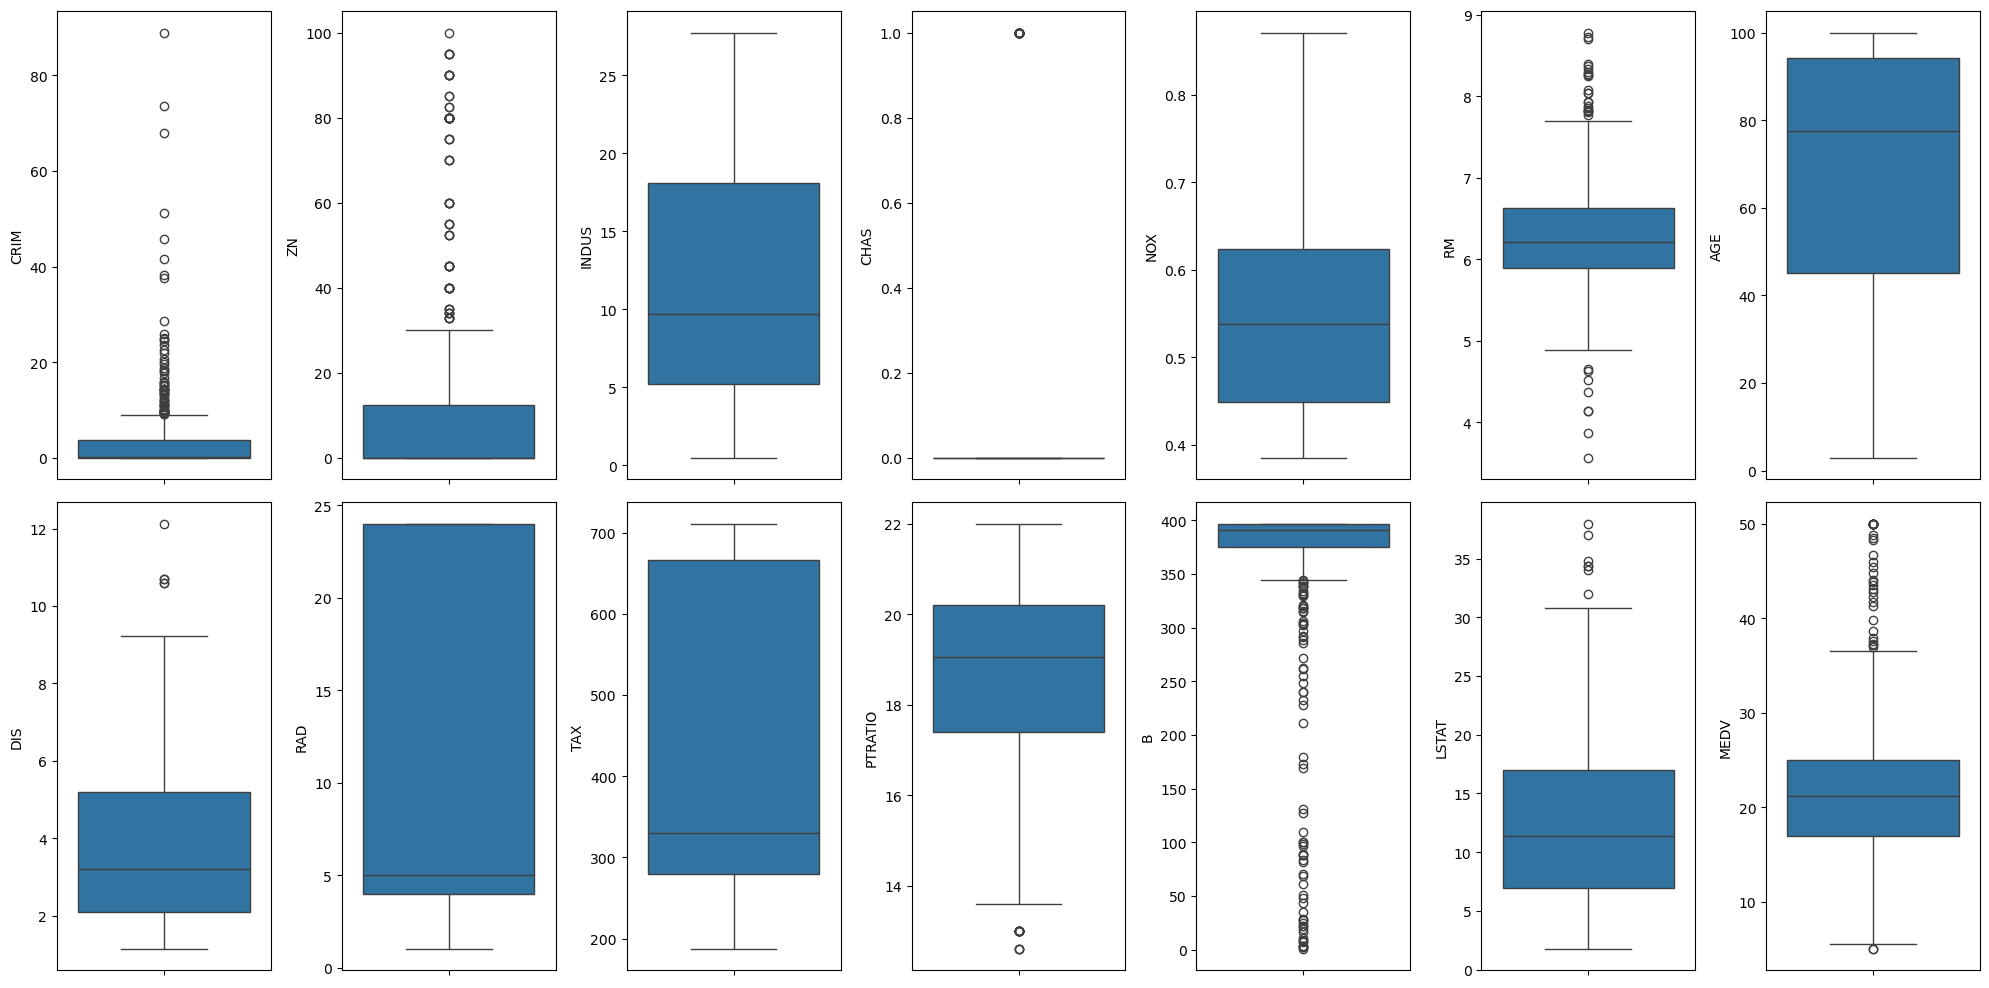

In [149]:
# Plot boxplot to see the outliers
fig, axes = plt.subplots(2,7, figsize=(20,10))
axs = axes.flatten()

for i,k in enumerate(data.columns):
    sns.boxplot(data, y=k, ax=axs[i])

plt.tight_layout()
    

In [150]:
# Printing the outlier percetage.
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


we can ignore the outliers in CHAS as it [0,1] and 

### Split data into train and test

In [152]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,Y_train, Y_test =train_test_split(X,Y, test_size=.2, random_state=21) # This splits the dataset at random. using  random_state for fix the split seed.

In [184]:
X_train.shape

(404, 13)

In [186]:
Y_train.shape

(404,)

# Building the Multiple Linear Regression Model
- Step 1: Import model of our choice
- Step 2: Instantiate an estimator object which contains the ML Algorithm
- Step 3: Fit the model on given data.
- Step 4: Use the model on the test dataset for prediction.
- Step 5: Evaluate model using appropriate evaluation methods.


In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
model_lr= LinearRegression()

In [188]:
model_lr.fit(X_train, Y_train)

LinearRegression()

In [190]:
model_lr.intercept_ # regression intercept

40.653176529790166

In [192]:
model_lr.coef_ # regression coefficent

array([-8.77422649e-02,  4.87770336e-02,  1.94746142e-02,  3.06314365e+00,
       -1.84821160e+01,  3.34704170e+00,  3.22024333e-03, -1.42569490e+00,
        3.25184188e-01, -1.20259158e-02, -1.05582832e+00,  1.07682087e-02,
       -5.38356500e-01])

In [194]:
# prediction
y_pred = model_lr.predict(X_test) # Always use only test data features

In [198]:
y_pred.shape

(102,)

In [202]:
# Let's see the test and predicted values using dataframe to see how much the actual vs prediction difference is. 
df = pd.DataFrame({'ytest':Y_test, 'ypred':y_pred})
df

,ytest,ypred
455,14.1,15.311568
142,13.4,15.324187
311,22.1,26.890855
232,41.7,37.384876
290,28.5,33.375220
...,...,...
486,19.1,20.027912
468,19.1,17.513802
302,26.4,29.172278
244,17.6,16.904621


In [211]:
# Evaluate the Model
# 1. R2 score - It says the model can fit 71% of the data. (Remember it is not error)
print(f"R2 score is: {model_lr.score(X_test, Y_test)}")

R2 score is: 0.7149364161392227


In [213]:
# 2. RMSE - Root Mean Squared Error ( )
from sklearn.metrics import mean_squared_error, root_mean_squared_error
print(f" RMSE value for test dataset is: {root_mean_squared_error(Y_test, y_pred)}")


 RMSE value for test dataset is: 5.1793243356580065


This means that there is on an average +/- 5.17*1000 dollars error